# PCLab#2 - Bagnara, Galfrè, Marcianò

## Table of Contents:
0. [Task #0](#task#0)
1. [Task #1](#task#1)
2. [Task #2](#task#2)
3. [Task #3](#task#3)
4. [Optional Task](#optional)

In [2]:
# importing libraries

import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tqdm.notebook import tqdm
import statsmodels.api as sm
from datetime import datetime, timedelta

import plotly.express as px
import plotly.figure_factory as ff
from scipy.stats import ttest_1samp
from scipy.stats import skewtest

from IPython.display import display_html
from itertools import chain,cycle

from sklearn.metrics import mean_squared_error

import yfinance as yf
import requests
import pprint
from bs4 import BeautifulSoup

In [3]:
# function used for displaying pandas dataframes
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [4]:
# list of colors used in the graphs
c = ["lightgreen","forestgreen","darkcyan","darkturquoise","royalblue", "dodgerblue","mediumblue","navy"]

## Task#0 Exploratory Data Analysis

In this part we explore the provided dataset. Since we are using the same data of the previous lab, we obtain the same exploratory results. In general it is often useful to perform this kind of initial analysis before using the data.

In [5]:
data = pd.read_csv("data/lab2/Data_PCLab2_Stock.csv") # importing data

In [5]:
data.info() # checking if there are missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [6]:
data.describe() # computing main summary statistics

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [7]:
print("starting date:", data.Date.min())
print("ending date:", data.Date.max())

starting date: 2012-01-12
ending date: 2020-08-11


The provided dataset contains daily stock prices of 8 companies and daily market values of the sp500 index.\
The observed time range goes from 2012-01-12 to 2020-08-11, for a total of 2159 observations

In [8]:
data['Date'] = pd.to_datetime(data['Date']) # setting data format
data.sort_values("Date",inplace=True) # sording by date
data.set_index('Date',inplace=True) # setting date as index

In [9]:
print("Number of stocks:",len(data.columns[:-1])) # removing sp500 (last column) from this counter

Number of stocks: 8


In [3]:
def plot_df(df,title="RAW STOCK PRICES (WITHOUT NORMALIZATION)",ylabel="Price",interactive=False):
    """
    this function plots the line plot of a given dataframe
    the function also receives as input a title, the y-axis label and interactive boolean parameter
    interactive = False -> matplotlib plot
    interactive = True -> plotly.express plot

    """
    if interactive == False:
        df.plot(figsize=(15,8))
        plt.title(title)
        plt.grid()
        plt.ylabel(ylabel);
        #plt.show()
    else:
        fig = px.line(df)
        fig.update_layout(
            title=title,
            yaxis_title=ylabel)
        fig.show()

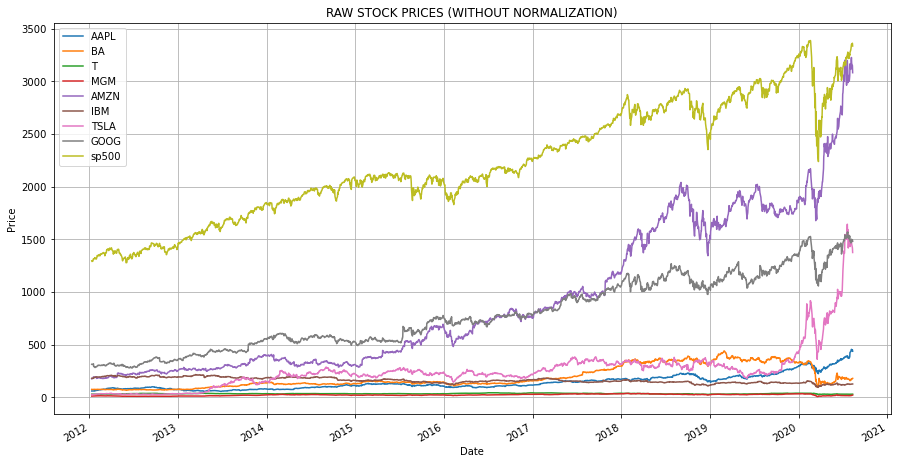

In [11]:
plot_df(data) # plotting stock prices

In [12]:
def compute_returns(data):
    """
    this functions receives prices as input and computes the returns
    """
    df = pd.DataFrame(data = 0, columns=data.columns,index=data.index[1:])

    for i in range(len(data)-1):
        df.iloc[i] = (data.iloc[i+1] - data.iloc[i])/data.iloc[i]
      
    return df

In [6]:
data

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [13]:
returns = compute_returns(data) # storing the dataframe of the returns
returns.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-13,-0.003749,-0.012051,-0.001660,0.018137,0.014153,-0.007699,-0.193274,-0.007385,-0.004948
2012-01-17,0.011648,0.008579,0.005986,-0.008097,0.018159,0.004689,0.167179,0.005744,0.003553
2012-01-18,0.010384,-0.002392,0.002645,0.039184,0.042827,0.005944,0.007895,0.006889,0.011108
2012-01-19,-0.003169,0.006661,0.002967,0.005499,0.026446,-0.003038,-0.001865,0.010523,0.004939
2012-01-20,-0.017417,-0.000529,0.002959,-0.012500,-0.018102,0.044316,-0.005979,-0.083775,0.000669


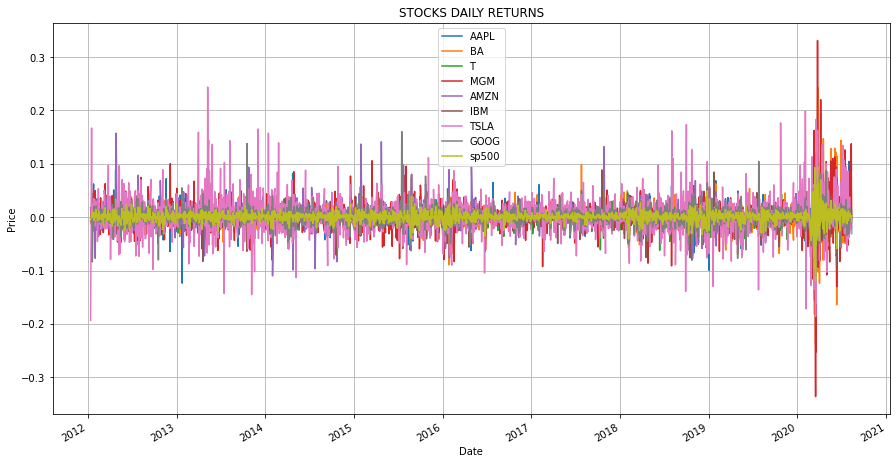

In [14]:
plot_df(returns,title="STOCKS DAILY RETURNS") # plotting stocks daily returns

As can be seen from the graph, the stocks returns all turned out to be roughly stationary around zero over the period under analysis.\
In a stationary process the average computed over the time steps converges to the mean of the stochastic process.

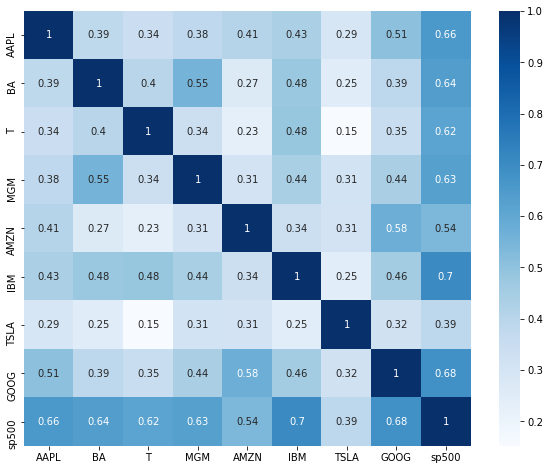

In [15]:
corr = returns.corr() # computing the dataframe with the correlations
plt.figure(figsize=(10,8)) # creating the correlation heat-map
sb.heatmap(corr,cmap='Blues',annot=True);

This correlation matrix provides some insights that will be useful in the CAPM framework. For example we can easily see that IMB and Google are the stocks most correlated with the sp500 (assumed to be the market), and we can draw important conclusion on the stocks fluctuations with respect to market behaviour. However the correlation should not be confounded with the CAPM's $\beta$, since they are differently computed.

## Task #1 : Visualization and 1st step toward the CAPM <a name="task#1"></a>

### 1.1 Use the ```PCLab_Data.csv``` to produce scatter plots of each stocks’ daily returns against the market daily returns

In [16]:
corr_df = pd.DataFrame(corr.loc["sp500"].sort_values(ascending=False)).tail(8) # sorting the stocks by their correlation with sp500
corr_df

,sp500
IBM,0.703935
GOOG,0.684571
AAPL,0.657320
BA,0.641826
MGM,0.631449
T,0.617463
AMZN,0.539560
TSLA,0.387920


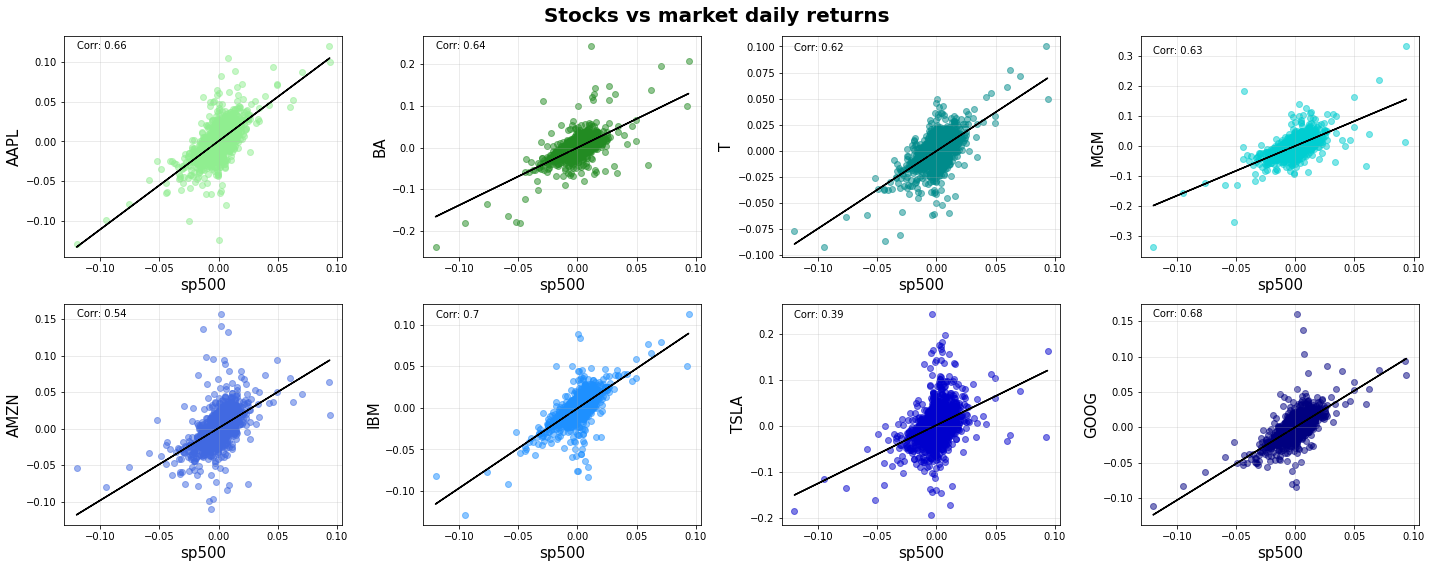

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (20,8))
fig.suptitle("Stocks vs market daily returns", fontsize = 20, weight = "bold")
axes = ax.flatten()
for i in range(len(axes)):
    axes[i].set_ylabel(returns.columns[i], fontsize = 15)
    axes[i].set_xlabel("sp500", fontsize = 15)
    axes[i].scatter(returns.sp500, returns.iloc[:,i], alpha = 0.5, c = c[i])
    axes[i].text(returns.sp500.min(),
                 np.quantile(returns.iloc[:,i], .9999),
                 f'Corr: {np.round(corr_df.loc[returns.columns[i]][0],2)}')
    
    #obtain m (slope) and b(intercept) of linear regression line
    m, b = np.polyfit(returns.sp500, returns.iloc[:,i], 1)

    #use red as color for regression line
    axes[i].plot(returns.sp500, m*returns.sp500+b, color='k')
    axes[i].grid(alpha = 0.3)
plt.tight_layout()

### 1.2 Comment : is there an apparent correlation ? Strong ? For which stock ?

The stocks most correlated with the market are *IBM*, *GOOG*, and *AAPL*, which, indeed, show a trend in the plots. In fact, they all have a correlation higher than 65%, meaning that they are the ones that have the most similar trend to that of SP500.\
Whereas, as it can be seen from the graph above, there is no apparent trend in the scatter plot of TSLA versus market returns, resulting, in fact, in a lower correlation.

# Task#2 : Compute alpha and beta <a name="task#2"></a>

### 2.1 Apply the CAPM : run an OLS regression of stock $\textit{i}$ returns on market returns, over the whole period. Assume $r_f = 0$. Are the estimates significant ?

In [18]:
# building a dataframe that stores, for each stock, its alpha and beta computed using daily returns and sp500 daily returns
# sp500 is assumed to be the market
coefficients = pd.DataFrame(columns=returns.columns[:-1], index = ["alpha", "p-value (alpha)", "beta", "p-value (beta)"])

for i in coefficients.columns: # looping across the 8 stocks
    Y = returns[i] # daily returns
    X = returns.sp500 # market daily returns
    X = sm.add_constant(X) # adding constant
    model = sm.OLS(Y,X)
    results = model.fit() # running the regression
    a,b = results.params # saving the coefficients
    pv_a, pv_b = results.pvalues # computing p-values for coefficients' significance test
    coefficients[i] = [a, pv_a, b, pv_b] # adding values to the dataframe

In [19]:
coefficients

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG
alpha,5.283661e-04,-2.291762e-05,-2.857670e-04,-1.689315e-04,1.022614e-03,-5.347977e-04,1.759166e-03,3.337108e-04
p-value (alpha),6.720205e-02,9.510957e-01,1.829420e-01,7.129865e-01,3.512136e-03,1.474740e-02,9.920397e-03,1.806546e-01
beta,1.112891e+00,1.382867e+00,7.446299e-01,1.653568e+00,9.917324e-01,9.604160e-01,1.268611e+00,1.034881e+00
p-value (beta),3.521164e-267,7.299279e-251,4.892378e-227,1.874186e-240,2.611172e-163,1.185758e-322,1.965135e-78,2.345742e-298


In [20]:
def check_significance(df, parameter, significance_level = 0.05):
    '''
    this function takes a dataframe with coefficients and corresponding p-values
    for the selected parameter (either alpha or beta), the function tells whether
    the coefficient for each stock is signficant or not
    The significance level can be speficied by the user (default is 0.05)
    '''
    if parameter not in ["alpha", "beta"]: # checking if the specified parameter is either alpha or beta
        raise Exception("The parameter must be either 'alpha' or 'beta'") # raising an error otherwise
    print(f"Is the {parameter} coefficient significant (confidence level: {np.round(1-significance_level,2)})?\n")
    for i in df.columns:
        pv = df.loc[f"p-value ({parameter})",i]
        if pv <= significance_level: # comparing the p value with significance level
            significance = "yes"
        else:
            significance = "no"
        print('{: <7} {: <0}'.format(i, significance))

In [21]:
for p in ["alpha", "beta"]:
    check_significance(coefficients, p, 0.05)
    print("-"*61)

Is the alpha coefficient significant (confidence level: 0.95)?

AAPL    no
BA      no
T       no
MGM     no
AMZN    yes
IBM     yes
TSLA    yes
GOOG    no
-------------------------------------------------------------
Is the beta coefficient significant (confidence level: 0.95)?

AAPL    yes
BA      yes
T       yes
MGM     yes
AMZN    yes
IBM     yes
TSLA    yes
GOOG    yes
-------------------------------------------------------------


After applying the CAPM, most of the stocks have a non significant $\alpha$, excluding AMZN and TSLA that show a positive and signficant coefficient, and IBM displaying a negative and significant term, both with a p-value smaller than 0.05.

On the other hand, all $\beta$ coefficients are statistically different from zero at 95% confidence level, implying that there is statistical evidence that the market has significant impact on the stocks returns.

### 2.2 Plot the beta and alpha for the 8 stocks. Which stock has the highest (lowest) beta and alpha ? Comment !

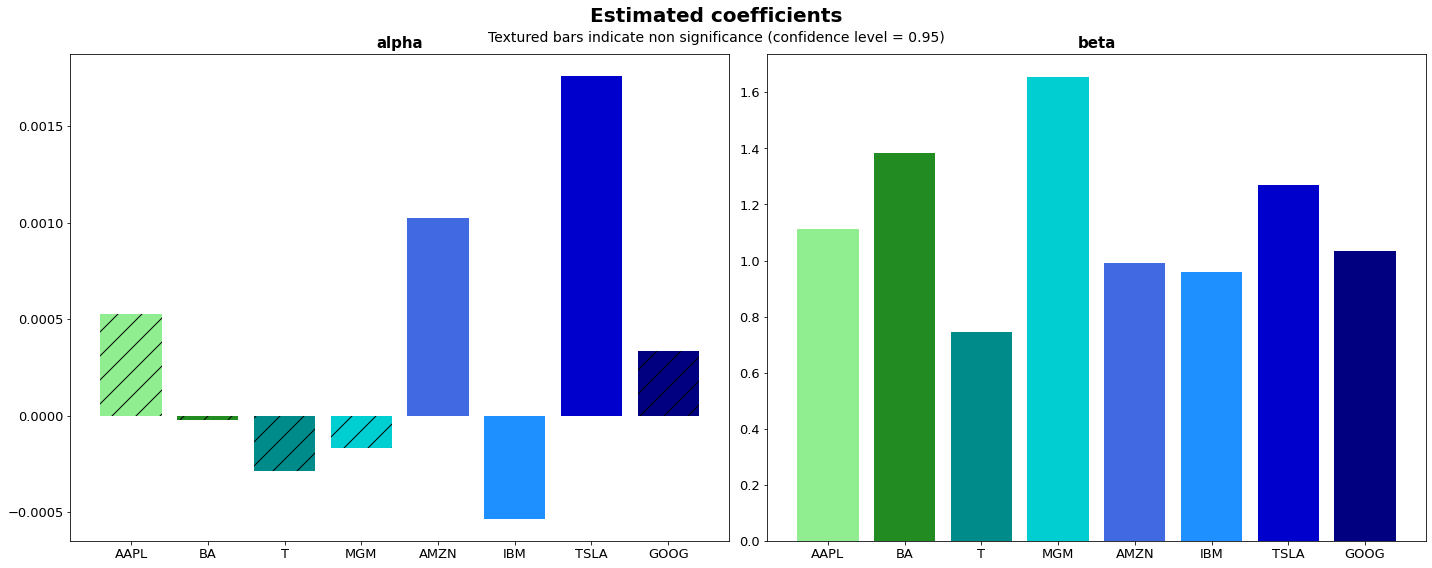

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,8))
alpha_sig = coefficients.loc[f"p-value (alpha)",:] > 0.05 # checking significance of the alphas
beta_sig = coefficients.loc[f"p-value (beta)",:] > 0.05 # checking signifcance of the betas

for i in range(len(coefficients.columns)): # looping across the 8 stocks
    texture = "/"
    if alpha_sig[i]: # if the stock is non-significant -> applies texture
        alpha_hatch = texture
    else:
        alpha_hatch = None

    if beta_sig[i]:
        beta_hatch = texture
    else:
        beta_hatch = None
        
    ax[0].bar(coefficients.columns[i], coefficients.loc["alpha", coefficients.columns[i]],
              hatch = alpha_hatch, color = c[i])
    ax[1].bar(coefficients.columns[i], coefficients.loc["beta", coefficients.columns[i]],
              hatch = beta_hatch, color = c[i])
    
fig.suptitle("Estimated coefficients", fontsize = 20, weight = "bold")
plt.figtext(0.5, 0.92, "Textured bars indicate non significance (confidence level = 0.95)", ha = "center", fontsize = 14)

ax[0].tick_params(axis = "both", which = "major", labelsize = 13)
ax[1].tick_params(axis = "both", which = "major", labelsize = 13)
ax[0].set_title("alpha", fontsize = 15, weight = "bold")
ax[1].set_title("beta", fontsize = 15, weight = "bold")
plt.tight_layout()


In [23]:
# storing the alphas and betas of the 8 stocks in two different dataframes (sorded in descending order)
alphas = pd.DataFrame(coefficients.loc['alpha']).sort_values('alpha', ascending=False)
betas = pd.DataFrame(coefficients.loc['beta']).sort_values("beta", ascending=False)

In [24]:
display_side_by_side(alphas, betas)

,alpha
TSLA,0.001759
AMZN,0.001023
AAPL,0.000528
GOOG,0.000334
BA,-0.000023
MGM,-0.000169
T,-0.000286
IBM,-0.000535
,beta
MGM,1.653568


The stocks with higher $\alpha$ are TSLA and AMZN.
This could be explained by the fact that stocks with an higher $\alpha$ usually tend to outperform the market, which seems to be reasonable with the stocks under analysis.
In a CAPM framework this implies that a stock has an extra return over the risk undertaken, independent from the market performance, theoretically opening the doors for arbitrage operations. This is coherent with the performance of Tesla and Amazon, two very innovative and successfull firms, regardless of market return.

The stocks with higher $\beta$ are MGM, BA, and TSLA.
In the CAPM theory, $\beta$ is referred to a stock's systematic risk compared to the market. Thus, those stocks with a $\beta$ greater than 1, i.e. AAPL, BA, TSLA, GOOG and MGM, can be interpreted as more volatile than the SP500, which usually results in higher returns. However, the higher exposure to market risk can also result in a bigger impact of market shocks, as proved by MGM and BA's recent turmoils, due to Covid.

### 2.3 Use the observed returns and the predicted ones to compute and plot the histogram of error terms $ε_{i}$ for each stock. Comment !

For this task we estimate the alpha and beta coefficients, regressing each stock daily returns on market daily returns. We use these coefficient to perform a prediction over the train test and we compare the forecasting performances when the alpha is excluded (as in the CAPM framework) or included in the prediction formula. Assuming $r_f = 0$ we therefore have the two following ways to predict stock's $\textit{i}$ returns:
* $ \hat{r}_i =  \hat \beta_i \cdot r_M$ (CAPM setting)
* $ \hat{r}_i =  \hat \alpha_i +  \hat \beta_i \cdot r_M$ (if we include the intercept)


In [25]:
# prediction WITHOUT the intercept (CAPM setting)
predicted = pd.DataFrame(index = returns.index, columns= returns.columns[:-1])
for i in predicted.columns:
    a,b = coefficients.loc[["alpha", "beta"], i] # retrieve the stock's i alpha and beta
    fitted = returns.sp500 * b
    predicted[i] = fitted

# storing the predicted daily returns into a dataframe

In [26]:
predicted.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG
Date,,,,,,,,
2012-01-13,-0.005507,-0.006842,-0.003684,-0.008182,-0.004907,-0.004752,-0.006277,-0.005121
2012-01-17,0.003954,0.004913,0.002646,0.005875,0.003524,0.003412,0.004507,0.003677
2012-01-18,0.012362,0.015361,0.008271,0.018368,0.011016,0.010668,0.014092,0.011495
2012-01-19,0.005496,0.006830,0.003677,0.008166,0.004898,0.004743,0.006265,0.005111
2012-01-20,0.000745,0.000926,0.000498,0.001107,0.000664,0.000643,0.000849,0.000693


In [27]:
# computing residuals
residuals = returns.iloc[:,:-1]-predicted
residuals.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG
Date,,,,,,,,
2012-01-13,0.001757,-0.005209,0.002024,0.026319,0.019060,-0.002947,-0.186997,-0.002265
2012-01-17,0.007694,0.003666,0.003340,-0.013972,0.014636,0.001276,0.162671,0.002067
2012-01-18,-0.001978,-0.017753,-0.005627,0.020816,0.031811,-0.004724,-0.006197,-0.004607
2012-01-19,-0.008666,-0.000168,-0.000710,-0.002668,0.021549,-0.007781,-0.008130,0.005412
2012-01-20,-0.018162,-0.001455,0.002460,-0.013607,-0.018766,0.043673,-0.006828,-0.084468


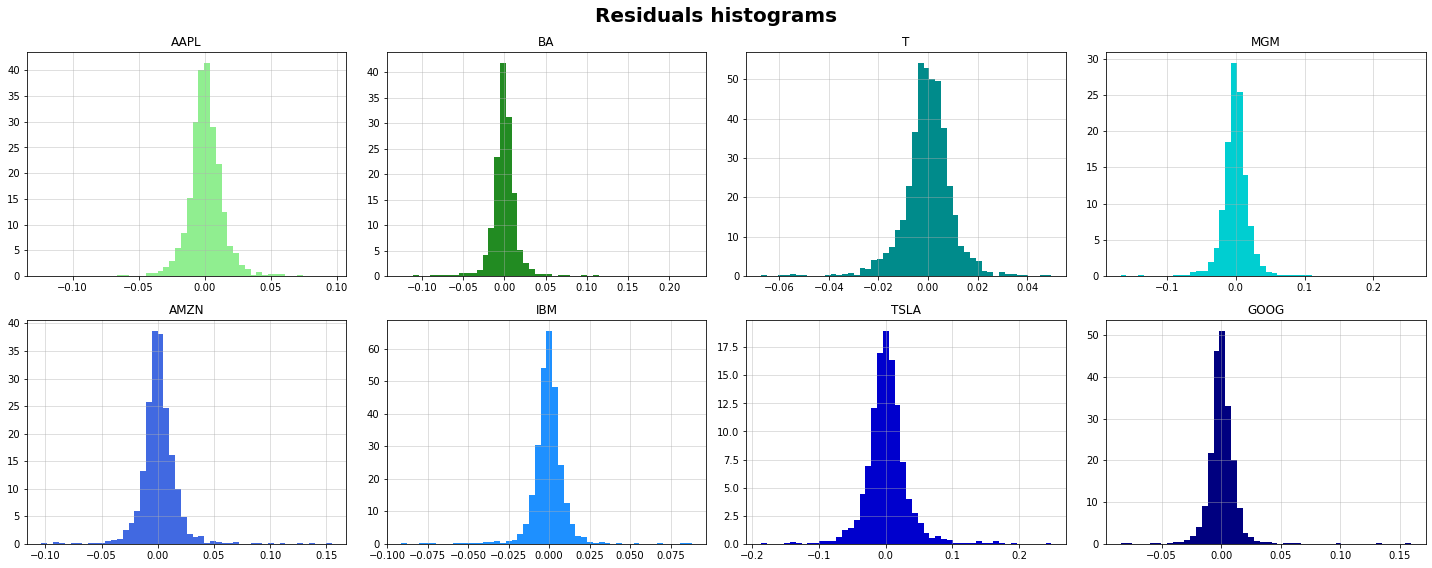

In [28]:
# plotting residuals' histograms for each stock
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (20,8))
fig.suptitle("Residuals histograms", fontsize = 20, weight = "bold")
axes = ax.flatten()
for i in range(len(axes)):
    axes[i].hist(residuals.iloc[:,i], bins = 50, color = c[i], density = True)
    axes[i].grid(alpha = 0.5)
    axes[i].set_title(residuals.columns[i])
    
plt.tight_layout()
    

By looking at the above distributions, it seems that residuals are normally distributed and centered around zero. Let's check this in detail.

In [29]:
residuals.mean()

AAPL    0.000528
BA     -0.000023
T      -0.000286
MGM    -0.000169
AMZN    0.001023
IBM    -0.000535
TSLA    0.001759
GOOG    0.000334
dtype: float64

The means seems to be very close to zero, but we should run t test to claim that the distributions are centered around zero.

In [30]:
# printing p-values for each stock for a t test
# we are testing if the sample average of each stock is significantly different than 0
for i in residuals.columns:
    pv = ttest_1samp(residuals[i], 0).pvalue
    print(i,"\t",pv)

AAPL 	 0.06683710879009691
BA 	 0.9510303025837019
T 	 0.1823571104310859
MGM 	 0.7126194906332797
AMZN 	 0.0034684542291024715
IBM 	 0.014614949006076726
TSLA 	 0.009821891630378414
GOOG 	 0.18007215370953328


Amazon and Tesla feature very low p values. We reject the null hypothesis that their mean is equal to zero. Therefore Amazon and Tesla residuals are not centered around 0, but have a positive mean, telling us that the CAPM is consistently underpredicting these stocks' returns. This is consistent with the fact thet indeed have positive and significant $\alpha$ which is not included in making this prediction.

For the sake of completeness of analysis, we also compute residuals' standard deviations, as a measure of idiosyncratic, and hence diversifiable, risk.

In [31]:
residuals.std()

AAPL    0.013385
BA      0.017333
T       0.009952
MGM     0.021302
AMZN    0.016235
IBM     0.010166
TSLA    0.031622
GOOG    0.011561
dtype: float64

TSLA and MGM feature the highest residuals standard deviations, implying these are the stocks most heavily subject to firm-specific shocks.

Now we perform the same forecast, adding the estimated intercept in the prediction formula.

In [32]:
# prediction WITH the intercept
predicted_intercept = pd.DataFrame(index = returns.index, columns= returns.columns[:-1])
for i in predicted_intercept.columns:
    a,b = coefficients.loc[["alpha", "beta"], i] # retrieve the stock's i alpha and beta
    fitted = a + returns.sp500 * b # we now add the intercept ("a") to perform the forecast
    predicted_intercept[i] = fitted


In [33]:
# storing the residuals in a dataframe
residuals_intercept = returns.iloc[:,:-1]-predicted_intercept
residuals_intercept.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG
Date,,,,,,,,
2012-01-13,0.001229,-0.005186,0.002310,0.026488,0.018038,-0.002412,-0.188756,-0.002598
2012-01-17,0.007166,0.003689,0.003626,-0.013803,0.013613,0.001811,0.160912,0.001734
2012-01-18,-0.002506,-0.017730,-0.005341,0.020985,0.030789,-0.004189,-0.007956,-0.004941
2012-01-19,-0.009194,-0.000145,-0.000424,-0.002499,0.020526,-0.007246,-0.009889,0.005078
2012-01-20,-0.018690,-0.001432,0.002746,-0.013438,-0.019789,0.044208,-0.008588,-0.084802


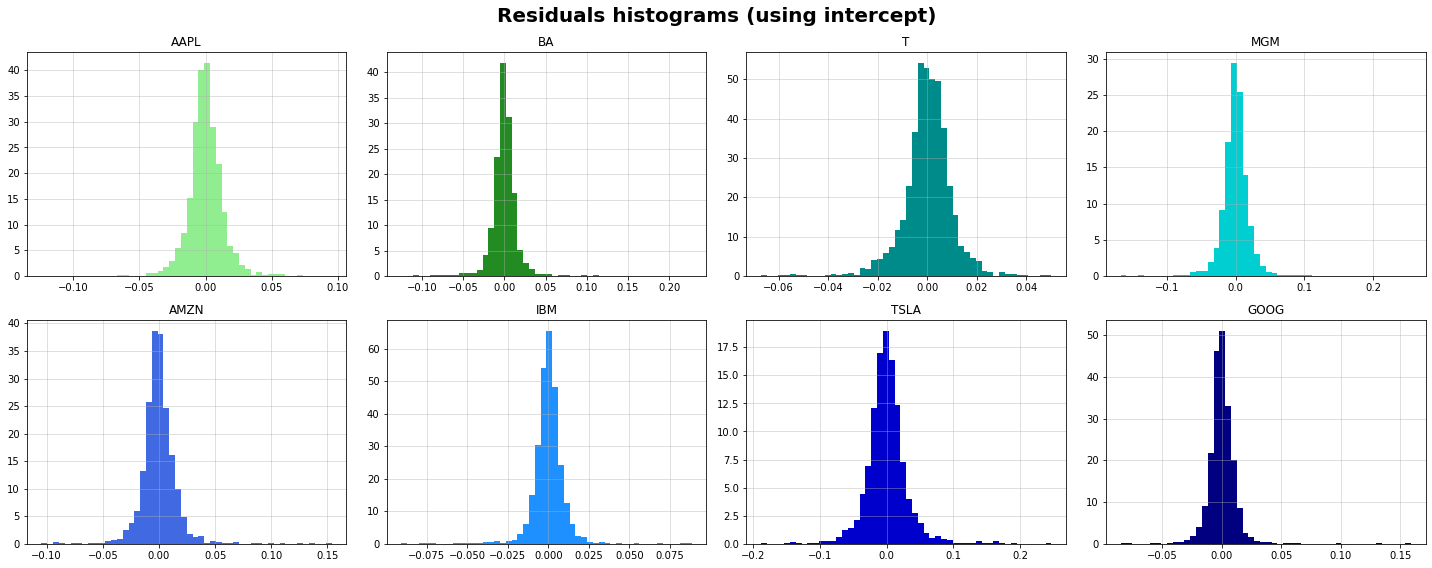

In [34]:
# residuals histograms
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (20,8))
fig.suptitle("Residuals histograms (using intercept)", fontsize = 20, weight = "bold")
axes = ax.flatten()
for i in range(len(axes)):
    axes[i].hist(residuals_intercept.iloc[:,i], bins = 50, color = c[i], density = True)
    axes[i].grid(alpha = 0.5)
    axes[i].set_title(residuals_intercept.columns[i])
    
plt.tight_layout()

Let's compute residuals means.

In [35]:
residuals_intercept.mean()

AAPL    5.176839e-19
BA      1.338422e-18
T       5.208994e-19
MGM     1.330383e-19
AMZN    5.643076e-19
IBM     4.083594e-19
TSLA    1.585206e-18
GOOG    6.045005e-19
dtype: float64

Residuals looks now much closer to zero. Let's perform again a $t$-test.

In [36]:
for i in residuals_intercept.columns:
    pv = ttest_1samp(residuals_intercept[i], 0).pvalue
    print(i,"\t",pv)

AAPL 	 0.9999999999999994
BA 	 0.9999999999999984
T 	 0.9999999999999984
MGM 	 0.9999999999999993
AMZN 	 0.999999999999999
IBM 	 0.999999999999998
TSLA 	 0.9999999999999984
GOOG 	 0.9999999999999984


All the p values of the t tests performed over the stocks are very big. We therefore cannot reject the null hypothesis that the mean is 0. This is a good result, since we want residuals to be centered around 0.

As we did for the case without the intercept, we computed again the residuals' standard deviation. We noted that the stds remain unchanged if we switch from the case without intercept (CAPM) to the case with intercept.

In [37]:
residuals_intercept.std()

AAPL    0.013385
BA      0.017333
T       0.009952
MGM     0.021302
AMZN    0.016235
IBM     0.010166
TSLA    0.031622
GOOG    0.011561
dtype: float64

### Skewness test
The fuction ```skewtest``` used below tests whether the skew is different from the normal distribution. We test the skewness of the residulas obtained without including the intercept alpha in the prediction (CAPM setting). A low p-value means that the distribution under analysis is skewed. The results obtained show that AAPL is the only one with a p-value greater than 0.05 thus implying skewness.

In [38]:
skewness = pd.DataFrame(index = residuals_intercept.columns, columns=["skewness_pvalue"])
skewness.style.format("{:.1f}")
for i in skewness.index:

    p = skewtest(residuals[i])[1]
    skewness.loc[i] = np.format_float_scientific(p, precision = 1, exp_digits=2)
       
skewness

,skewness_pvalue
AAPL,2.e-01
BA,6.3e-83
T,1.9e-42
MGM,5.4e-30
AMZN,3.6e-77
IBM,1.7e-46
TSLA,7.8e-31
GOOG,1.2e-127


From the recap table above, we see that all the residuals distributions feature low p-values. We reject the null hypothesis and we can claim that the distributions are skewed. This is an undesired result, since we would like to have normally distributed residuals.

### 2.4 Your boss wants to take a lot of risk to deliver high return. He asks you to (i) select the 4 riskiest assets (over the full period), (ii) form an equally weighted portfolio, and (iii) to estimate the portfolio return based on parameters (β and rm) estimated above.

In [39]:
volatilities = pd.DataFrame(returns.std().sort_values(ascending = False), columns= ["Volatility"])
volatilities

,Volatility
TSLA,0.034308
MGM,0.027472
BA,0.022603
AMZN,0.019283
AAPL,0.017762
GOOG,0.015859
IBM,0.014313
T,0.012651
sp500,0.010491


In [40]:
risky_assets = list(volatilities.index[:4])
print("The four riskiest assets are:",risky_assets)

The four riskiest assets are: ['TSLA', 'MGM', 'BA', 'AMZN']


In [41]:
# we construct the weights of an equally weighted portfolio
weights = np.ones(len(risky_assets))/len(risky_assets)
weights

array([0.25, 0.25, 0.25, 0.25])

In [42]:
# computing daily returns of the Equally Weighted portfolio.
# we use the returns forcasted with the CAPM
EW_portfolio = pd.DataFrame(np.dot(predicted[risky_assets], weights), index = returns.index, columns=["EW_portfolio"])
EW_portfolio.head()
# we obtain a dataframe with the daily returns of the EW portfolio

,EW_portfolio
Date,
2012-01-13,-0.006552
2012-01-17,0.004705
2012-01-18,0.014709
2012-01-19,0.006540
2012-01-20,0.000886


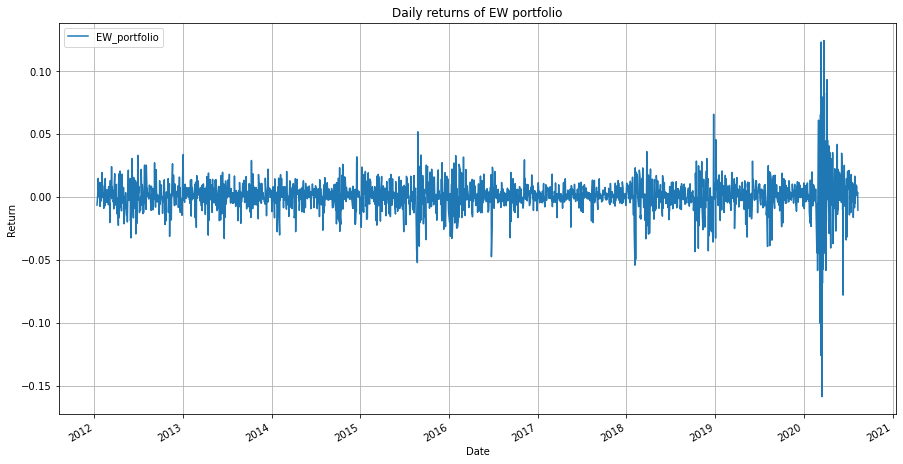

In [43]:
plot_df(EW_portfolio,title="Daily returns of EW portfolio",ylabel='Return')

In [44]:
def compute_pf_returns(w, returns):
    """
    takes as input a vector of weights and a dataframe of returns
    it returns the expected return of the portfolio
    """
    return np.dot(returns.mean(), np.array(w)) * 252 # we are assuming 252 trading days and simple interest (no compounding)

def compute_pf_variance(w, returns):
    """
    takes as input a vector of weights and a dataframe of returns
    it returns portfolio variance
    """
    return (np.array(w).T @ returns.cov() @ np.array(w)) * 252
    
def compute_sharpe_ratio(avg_r,var,rf=0):
    """
    takes as input a vector of weights and a dataframe of returns
    it returns portfolio sharpe ratio
    """
    return (avg_r - rf) / np.sqrt(var)

We decided to compare realized and predicted returns and variance of portfolio with risky assets.
If we apply the CAPM theory the portfolio return is heavily understimated, as the realized return of the portfolio is roughly twice the predicted (and so is the variance).

Secondly, we added the intercept in hopes of improving performance. At first glance, it appears that with the $\alpha$ the prediction is incredibly accurate. However, we must remember that this is in-sample prediction, meaning that it has to be considered as a training result and we should beware of overfitting risk.

In [45]:
print("Realized portfolio return:",np.round(compute_pf_returns(weights, returns[risky_assets]),3), 
      "\t\tVariance:",np.round(compute_pf_variance(weights, returns[risky_assets]),3))
print("Predicted portfolio return (no alpha):",np.round(compute_pf_returns(weights, predicted[risky_assets]),3), 
      "\tVariance:",np.round(compute_pf_variance(weights, predicted[risky_assets]),3))
print("Predicted portfolio return (with alpha):",np.round(compute_pf_returns(weights, predicted_intercept[risky_assets]),3), 
      "\tVariance:",np.round(compute_pf_variance(weights, predicted_intercept[risky_assets]),3))

Realized portfolio return: 0.328 		Variance: 0.086
Predicted portfolio return (no alpha): 0.165 	Variance: 0.049
Predicted portfolio return (with alpha): 0.328 	Variance: 0.049


# Task #3 : Testing the CAPM theory <a name="task#3"></a>

### 3.1 For each year : compute β over 252 business days at the end of each year y − 1 (OLS regression)

In [46]:
def yearly_capm_pred(returns, start, end, training_period = 1*365, intercept = False):

    """
    this function receive as input the following parameters
      returns -> a dataframe with daily returns to train and test the predicting performance
      start/end -> the starting and ending dates of the period under analysis
      training_period -> the number of days to be used as training dataset
      intercept = True/False -> whether we want to include the intercept in the forecast
    """
    # creating 3 empty dataframes to store the estmated OLS coefficients, the fitted values and the actual realized values
    params = pd.DataFrame(columns=returns.columns[:-1]) 
    pred = pd.DataFrame(columns=returns.columns[:-1])
    realized = pd.DataFrame(columns=returns.columns[:-1])


    for y in range(start, end): # looping across the years
        
        # using "training_period" we define the training dataset
        lag = training_period - 365
        start_train = str(datetime.strptime(str(y)+"-01-01", "%Y-%m-%d") - timedelta(lag))[:10]
        df_train = returns[(returns.index >=start_train) & (returns.index<=str(y)+"-12-31")]

        # define the test dataset
        df_test = returns[(returns.index >=str(y+1)+"-01-01") & (returns.index<=str(y+1)+"-12-31")]

        # computing yearly market returns
        yearly_return_sp500 = df_test.sp500.mean() * 252

        for i in params.columns:

            # train OLS 
            Y = df_train[i]
            X = df_train.sp500
            X = sm.add_constant(X)
            model = sm.OLS(Y,X)
            results = model.fit()
            a,b = results.params
            params.loc["alpha_"+str(y),i] = a
            params.loc["beta_"+str(y),i] = b

            # predict with OLS
            if intercept: # checking if the user asked to predict with the intercept
                alpha = a
            else:
                alpha = 0 # predicting with CAPM
                
            fitted = yearly_return_sp500 * b + alpha
            pred.loc[y+1,i] = fitted

        # realized annual returns
        rel = df_test.mean() * 252
        realized.loc[y+1] = rel[:-1] # removing sp500
        
    return params, pred, realized

In [47]:
params, pred, realized = yearly_capm_pred(returns, 2012, 2020, training_period = 365*1, intercept=False)

In [48]:
print("The betas and alphas obtained running a OLS regression using as training period the year before are the followings:")
params

The betas and alphas obtained running a OLS regression using as training period the year before are the followings:


,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG
alpha_2012,0.000589,-0.000378,0.000241,-0.000661,0.00118,-0.000071,0.000638,0.000213
beta_2012,1.283028,1.024616,0.616265,1.732747,1.123074,0.856619,1.611417,0.860334
alpha_2013,-0.000287,0.00143,-0.000611,0.001356,0.000651,-0.00082,0.005582,0.000923
beta_2013,0.626566,0.966673,0.784543,1.526288,1.265466,0.765491,1.174505,0.945169
alpha_2014,0.000985,-0.000583,-0.000396,-0.000868,-0.001448,-0.000892,0.001145,-0.000736
beta_2014,0.83549,1.021059,0.564327,1.492332,1.46336,0.729346,1.900735,1.279824
alpha_2015,-0.000068,0.000497,0.000133,0.00051,0.003288,-0.000538,0.000579,0.001609
beta_2015,1.145075,0.999672,0.721119,1.479366,1.119326,1.019357,1.136643,1.084603
alpha_2016,0.000088,-0.000071,0.000696,0.000492,0.000145,0.000453,-0.000642,-0.00023
beta_2016,1.009962,1.217194,0.476372,1.669338,1.116334,0.931592,1.215942,0.952996


### 3.2 At the end or year y, compare the average return of the stock (annualized) to the one predicted by the CAPM model (using β measured at y − 1 but the average market return measured at y).

In [49]:
residuals = realized - pred
residuals 

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG
2013,-0.246627,0.344978,-0.109349,0.286806,0.201886,-0.230835,1.290526,0.25517
2014,0.272067,-0.140673,-0.124966,-0.222718,-0.342347,-0.228932,0.371665,-0.147107
2015,-0.015792,0.12524,0.0343,0.128447,0.826852,-0.134105,0.142224,0.404663
2016,0.008771,0.003722,0.151004,0.142834,0.036194,0.105506,-0.153822,-0.07119
2017,0.214228,0.438035,-0.160725,-0.122876,0.266336,-0.234845,0.221017,0.145655
2018,0.039594,0.189134,-0.243882,-0.181516,0.382118,-0.236643,0.302904,0.092511
2019,0.328289,-0.291075,0.15934,-0.003739,-0.191161,-0.066946,-0.010222,-0.074216
2020,0.565245,-0.558832,-0.410165,-0.226027,0.734616,-0.126419,2.21706,0.080188


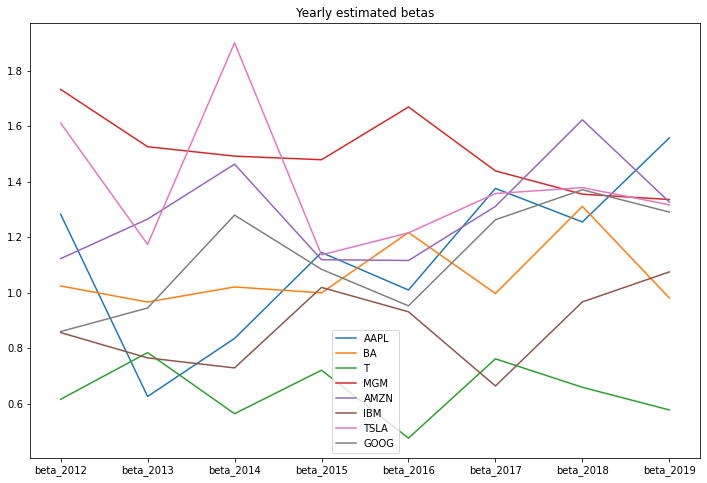

In [50]:
params[params.index.str.startswith('beta')].plot(figsize=(12,8))
plt.title("Yearly estimated betas");

In the observed time window, MGM consistently had the highest $\beta$, excluding 2014 and the last couple of years analysed.

### 3.3 Generate the scatter plot of the realized returns against the beta or find innovative ways to plot you results.

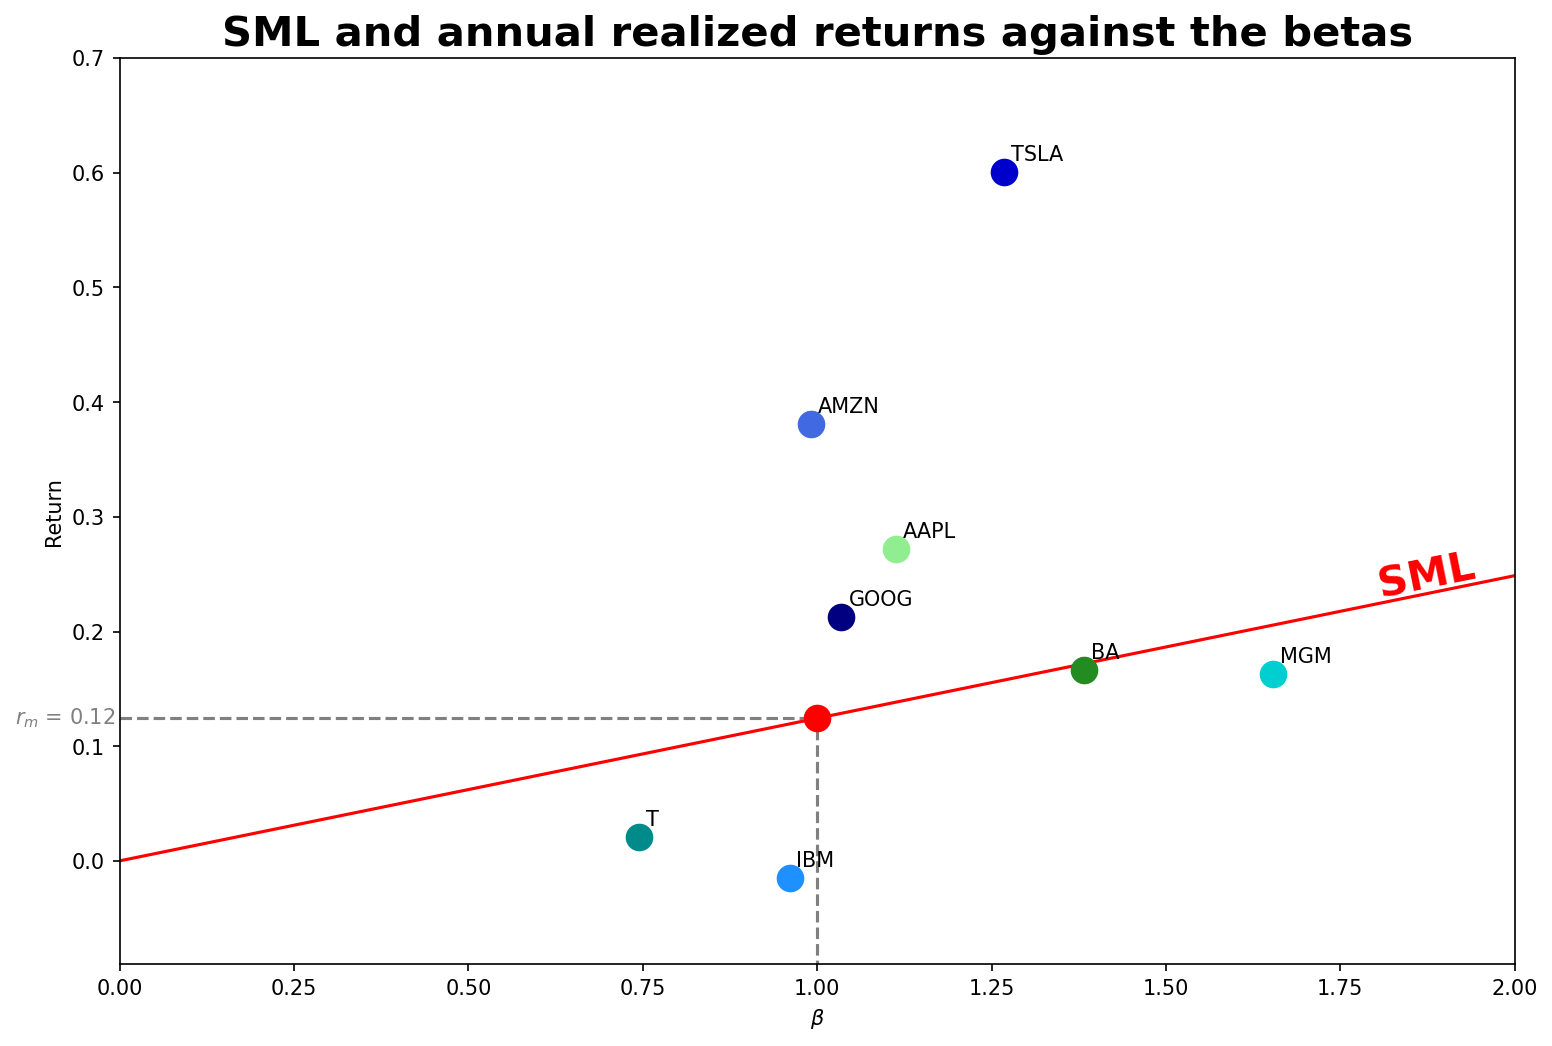

In [51]:
# plotting the SML and the 8 stocks

plt.figure(figsize = (12, 8), dpi = 150)
plt.ylim(-0.09,0.7)
plt.xlim(0,2)
plt.title("SML and annual realized returns against the betas", weight = "bold", size = 20)
plt.xlabel(r'$\beta$')
plt.ylabel("Return")
for i in range(len(returns.columns[:-1])):
    plt.scatter(coefficients.loc["beta"][i],  returns.mean()[i]*252, c = c[i], s = 150)
    plt.text(coefficients.loc["beta"][i] + 0.01,  returns.mean()[i]*252+ 0.01, returns.columns[i])
betas = np.linspace(0,2,1000)
SML = betas*returns.sp500.mean()*252
plt.plot(betas, SML, c = "red", zorder = -10)
plt.text(1.8, 0.23, "SML", rotation = 11.4, fontsize = 20, weight = "bold", c = "r")
plt.scatter(1, returns.sp500.mean()*252, s = 150, c = "r", zorder = 10)
plt.vlines(x = 1, ymin = returns.mean().min()*252 - 0.5, ymax = returns.sp500.mean()*252, linestyle = "dashed", color = "gray")
plt.hlines(y = returns.sp500.mean()*252, xmin = 0, xmax = 1, linestyle = "dashed", color = "gray")
plt.text(-0.15,returns.sp500.mean()*252, f"$r_m$ = {np.round(returns.sp500.mean()*252,2)}", c = "gray", va = "center");

In [52]:
# generating arrays with betas and realized returns
beta_list = np.array(params[params.index.str.startswith('beta')].T).flatten()
return_list = np.array(realized.T).flatten()

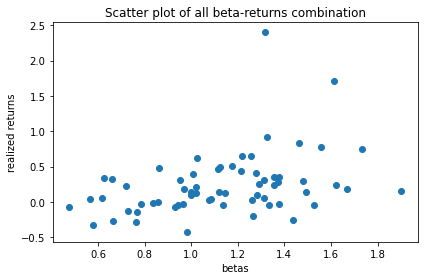

In [53]:
plt.title("Scatter plot of all beta-returns combination")
plt.xlabel("betas")
plt.ylabel("realized returns")
plt.scatter(beta_list, return_list)
plt.tight_layout()

In [54]:
# creating a dataframe with the generated lists of data
scatter_df = pd.DataFrame(data = {"betas":beta_list, "returns":return_list}).sort_values("betas").reset_index(drop = True)
scatter_df.loc[0:4]

,betas,returns
0,0.476372,-0.074753
1,0.564327,0.036940
2,0.57796,-0.329690
3,0.616265,0.054289
4,0.626566,0.343711


In [55]:
# binning every 4 datapoints (computing averages)
a_list = []
b_list = []
for i in range(0, len(scatter_df),4):
    b = scatter_df.iloc[i:i+4].mean()[0]
    a = scatter_df.iloc[i:i+4].mean()[1]
    b_list.append(b)
    a_list.append(a)

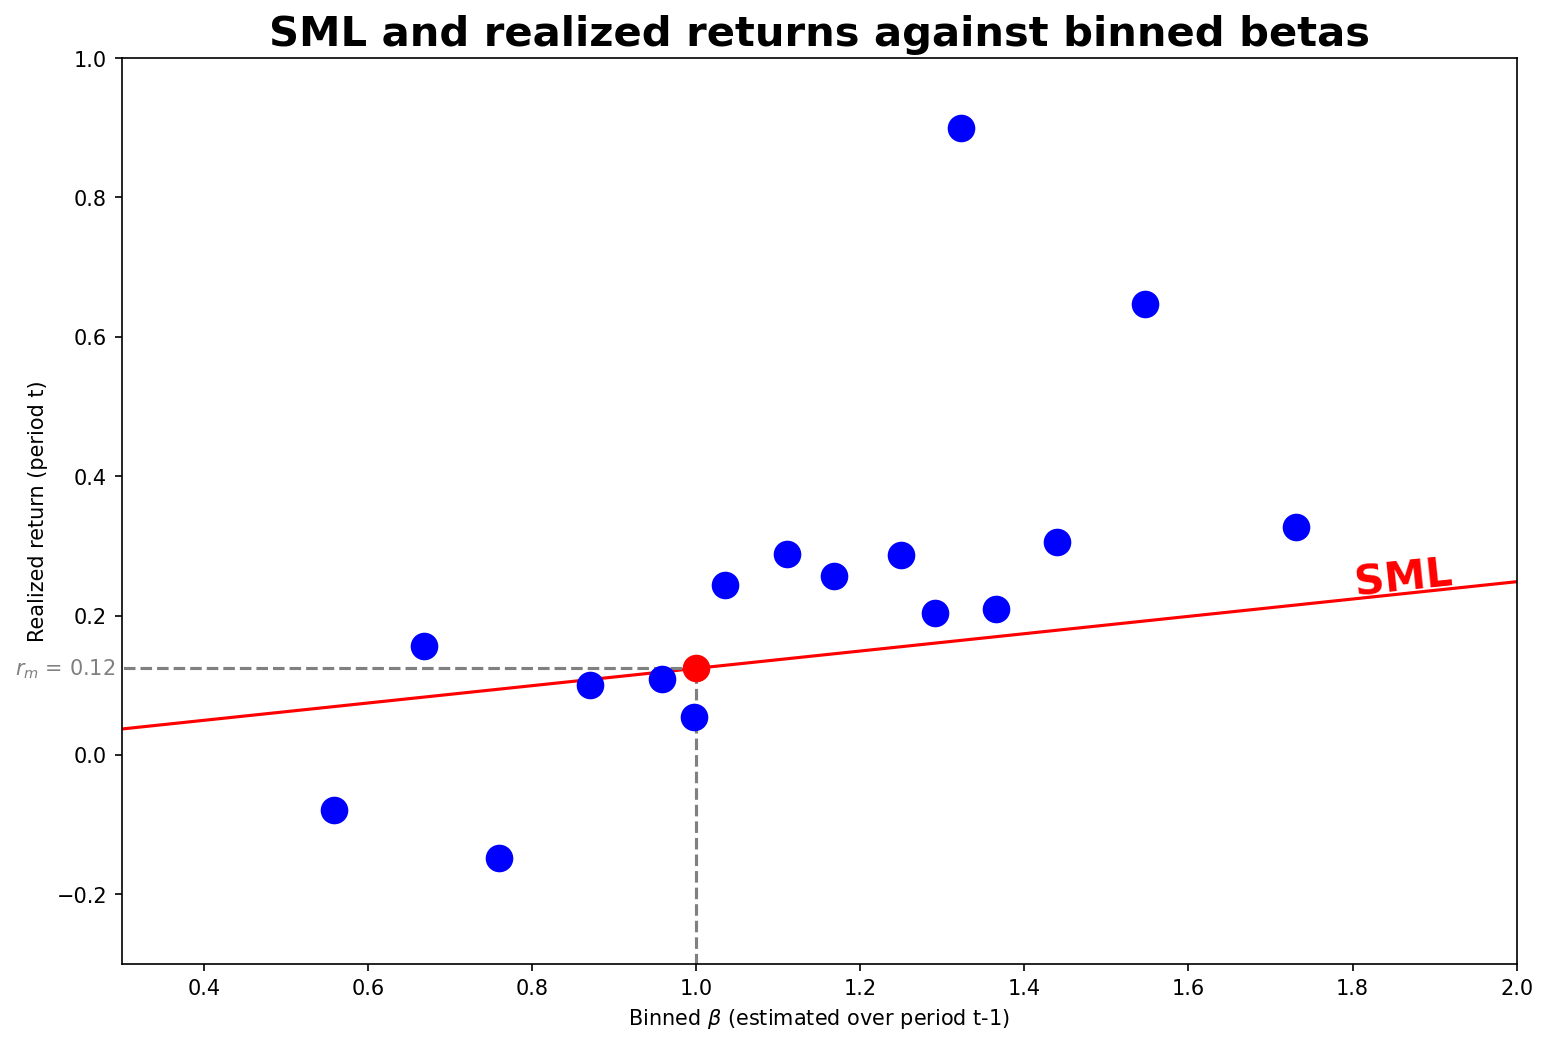

In [56]:
# UPDATED SCATTER PLOT (WITH BINNED BETAS)

plt.figure(figsize = (12, 8), dpi = 150)
plt.xlim(0.3,2)
plt.ylim(-0.3,1)
plt.title("SML and realized returns against binned betas", weight = "bold", size = 20)
plt.xlabel(r'Binned $\beta$ (estimated over period t-1)')
plt.ylabel("Realized return (period t)")
plt.scatter(b_list,a_list, color = "blue", s = 150, zorder = 10)
betas = np.linspace(0,2,1000)
SML = betas*returns.sp500.mean()*252
plt.plot(betas, SML, c = "red", zorder = -10)
plt.text(1.8, 0.23, "SML", rotation = 6, fontsize = 20, weight = "bold", c = "r")
plt.scatter(1, returns.sp500.mean()*252, s = 150, c = "r", zorder = 10)
plt.vlines(x = 1, ymin = returns.mean().min()*252 - 0.5, ymax = returns.sp500.mean()*252, linestyle = "dashed", color = "gray")
plt.hlines(y = returns.sp500.mean()*252, xmin = 0, xmax = 1, linestyle = "dashed", color = "gray")
plt.text(0.17,returns.sp500.mean()*252, f"$r_m$ = {np.round(returns.sp500.mean()*252,2)}", c = "gray", va = "center");    

In the graph above we plotted the Security Market Line, showing the relationship between an asset’s premium and its market $\beta$. Then, for each stock, we plotted their $\beta$ and expected returns. In a CAPM world, the stocks positioned above the SML would be characterized by an extra return over market risk (i.e. they have a positive $\alpha$). However, we are not including risk factors that could justify these extra returns. 

### 3.4 Alternatively, you may use a β computed over longer (shorter) periods of time.

In [57]:
# train on 1 year, predict WITHOUT intercept
params1, pred1, realized1 = yearly_capm_pred(returns, 2012, 2020, training_period = 365*1, intercept=False)

# train on 1 year, predict WITH intercept
params1_int, pred1_int, realized1_int = yearly_capm_pred(returns, 2012, 2020, training_period = 365*1, intercept=True)

# train on 2 years, predict WITHOUT intercept
params2, pred2, realized2 = yearly_capm_pred(returns, 2012, 2020, training_period = 365*2, intercept=False)

# train on 2 years, predict WITH intercept
params2_int, pred2_int, realized2_int = yearly_capm_pred(returns, 2012, 2020, training_period = 365*2, intercept=True)

# train on 6 months, predict WITHOUT intercept
params6, pred6, realized6 = yearly_capm_pred(returns, 2012, 2020, training_period = 365*0.5, intercept=False)

# train on 6 months, predict WITH intercept
params6_int, pred6_int, realized6_int = yearly_capm_pred(returns, 2012, 2020, training_period = 365*0.5, intercept=True)

# train on 4 years, predict WITHOUT intercept
params4, pred4, realized4 = yearly_capm_pred(returns, 2012, 2020, training_period = 365*4, intercept=False)

# train on 4 years, predict WITH intercept
params4_int, pred4_int, realized4_int = yearly_capm_pred(returns, 2012, 2020, training_period = 365*4, intercept=True)

In [58]:
MSE = pd.DataFrame(columns=["Training period", "Intercept", "Mean Squared Error"])
MSE.loc[0] = ["1 year", "No", mean_squared_error(realized1, pred1)]
MSE.loc[1] = ["1 year", "Yes", mean_squared_error(realized1_int, pred1_int)]
MSE.loc[2] = ["2 years", "No", mean_squared_error(realized2, pred2)]
MSE.loc[3] = ["2 years", "Yes", mean_squared_error(realized2_int, pred2_int)]
MSE.loc[4] = ["6 months", "No", mean_squared_error(realized6, pred6)]
MSE.loc[5] = ["6 months", "Yes", mean_squared_error(realized6_int, pred6_int)]
MSE.loc[6] = ["4 years", "No", mean_squared_error(realized4, pred4)]
MSE.loc[7] = ["4 years", "Yes", mean_squared_error(realized4_int, pred4_int)]

MSE

,Training period,Intercept,Mean Squared Error
0,1 year,No,0.173294
1,1 year,Yes,0.173251
2,2 years,No,0.172966
3,2 years,Yes,0.172840
4,6 months,No,0.182007
5,6 months,Yes,0.181644
6,4 years,No,0.173493
7,4 years,Yes,0.173372


### 3.5 Comment your results in the light of yesterday’s lecture : try to give as much economic interpretation as you can !

From the table above we can see how, with the same train set, taking out intercept worsens prediction performance. Therefore, CAPM seems to be not the best model, since it is not considering other risk factors. Including the intercept is still not sufficient and we would need to rely on more sophisticated model (such as APT).
The training period resulting in the smallest MSE was two years. In fact, if we shorten this period, the MSE increases possibly because we do not have enough observed data. If, instead, we lengthen it to 4 years, the dataset contains observations that are probably too remote and not useful for making predictions.

# <font color='#cc4054'> Optional </font> Task : Obtain data from the web <a name="optional"></a>

### 4.1 Web-scrapping : get the list of S&P 500 tickers from Wikipedia

In [59]:
URL = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
# Retrieve the HTML page of the URL
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')

In [60]:
tt = soup.find_all('a', class_="external text")
tickers = [] 

for ticker in tt:
    text = ticker.get_text()
    if text != 'reports' and len(text)< 10:
        tickers.append(ticker.get_text())

In [61]:
tickers[:5]

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD']

In [62]:
len(tickers)

503

### 4.2 Use the list of tickers as input in the yfinance package (an API that gives access to Yahoo Finance data)

In [63]:
# pip install yfinance 

In [64]:
date1 = "2012-01-01"
date2 = "2022-01-01"
web_data = yf.download(tickers, start=date1,
end=date2)

[*********************100%***********************]  503 of 503 completed

4 Failed downloads:
- DD: No data found for this date range, symbol may be delisted
- CEG: Data doesn't exist for startDate = 1325372400, endDate = 1640991600
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [65]:
web_data

Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2012-01-03   23.737436   4.826836   64.800629   12.540047         NaN   
2012-01-04   23.548727   4.741990   66.319832   12.607440         NaN   
2012-01-05   24.075794   5.156796   66.741837   12.747403         NaN   
2012-01-06   24.336079   5.279353   67.051270   12.880665         NaN   
2012-01-09   24.973759   5.392482   67.032547   12.860233         NaN   
...                ...        ...         ...         ...         ...   
2021-12-27  158.002853  18.170000  230.693222  179.586868  130.686066   
2021-12-28  158.440781  18.540001  232.283218  178.551132  130.666611   
2021-12-29  159.903961  18.049999  235.112000  178.640778  131.609756   
2021-12-30  160.132904  18.070000  231.688202  177.465637  132.163956   
2021-12-31  158.908615  17.959999  233.990234  176.838242  131.648621   

                                                                        ...  \
                   ABC        ABMD         ABT         ACN        ADBE  ...   
Date                                                                    ...   
2012-01-03   32.145939   18.250000   21.909372   43.323875   28.570000  ...   
2012-01-04   32.255714   18.110001   21.824390   43.307518   28.280001  ...   
2012-01-05   32.500595   18.270000   21.774183   42.481113   28.480000  ...   
2012-01-06   32.585018   18.139999   21.577177   42.407486   28.719999  ...   
2012-01-09   32.568138   18.209999   21.573313   42.333847   28.530001  ...   
...                ...         ...         ...         ...         ...  ...   
2021-12-27  130.665649  357.829987  139.781876  411.562225  577.679993  ...   
2021-12-28  131.121353  357.440002  138.803619  411.502747  569.359985  ...   
2021-12-29  132.092163  361.839996  139.515091  411.651428  569.289978  ...   
2021-12-30  132.518158  362.059998  139.327332  410.075867  570.530029  ...   
2021-12-31  131.646378  359.170013  139.070404  410.789307  567.059998  ...   

             Volume                                                         \
               WYNN      XEL       XOM     XRAY      XYL      YUM      ZBH   
Date                                                                         
2012-01-03  2032400  3734100  20906800   955000  1059100  4735660  2016843   
2012-01-04  1724100  1919000  16130900   561400  1391900  5013164  1807650   
2012-01-05  2247000  2125100  17452800   981600  2270700  5059623  2264970   
2012-01-06  3059100  1454500  15942100   720800   524400  3761264  1692290   
2012-01-09  1567700  1396800  11664200   546700   558700  3684620  1762948   
...             ...      ...       ...      ...      ...      ...      ...   
2021-12-27  2212800  1211500  12593700  1268500   837200  1095400  1221065   
2021-12-28  1758900  1213900  12781000   772100   402400   662000  1506581   
2021-12-29  2440100  1502600  12733600  1112400   708800  1139300  2508771   
2021-12-30  2457700  1744500  11940300  1119100   401400   538500  1304701   
2021-12-31  2406200  5704600  14072000   578900   428900   757800   941008   

                                        
              ZBRA     ZION        ZTS  
Date                                    
2012-01-03  120900  3442600        NaN  
2012-01-04  252500  3478800        NaN  
2012-01-05  186500  4965600        NaN  
2012-01-06  194400  2994800        NaN  
2012-01-09  169400  2078900        NaN  
...            ...      ...        ...  
2021-12-27  636400   495500   807000.0  
2021-12-28  139500   497200  1004400.0  
2021-12-29  128600   691600   939900.0  
2021-12-30   87500   413100   859100.0  
2021-12-31  117100   552900  1073400.0  

[2517 rows x 3018 columns]

In [66]:
# example of one stock

date1 = "2012-01-01"
date2 = "2022-01-01"
amzn_data = yf.download("AMZN", start=date1,
end=date2)

[*********************100%***********************]  1 of 1 completed


In [67]:
amzn_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
2012-01-04,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2012-01-05,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
2012-01-06,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
2012-01-09,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...
2021-12-27,171.037003,172.942993,169.215500,169.669495,169.669495,58688000
2021-12-28,170.182495,172.175995,169.135498,170.660995,170.660995,54638000
2021-12-29,170.839996,171.212006,168.600494,169.201004,169.201004,35754000


### 4.3 Describe and comment the data. Why do you have more variables than in the ```PCLab_Data.csv``` file ?

Downloading the data through the yfinance library for each stock we have broader information about the trading day. Specifically, we can see the stock's opening and closing price, that is the price at which it was first and last traded that day, as well as maximum and minimum price. Adjusted closing price is also provided, which includes adjustments for splits and dividend distributions. Finally, the volume is reported, meaning the total number of times the security exchanged hands on that day.

The main advantage related to scraping our own data is the flexibility in terms of time horizon. However, the ```PCLab_Data.csv``` might be preferable since it has already been preprocessed and does not contain missing values, which may be due to listing, delisting, and m&a operations.